In [96]:
from __future__ import division # For python 2.*
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import (tree,model_selection,metrics,neural_network,svm,kernel_approximation,
                     preprocessing,ensemble,neighbors,cluster,metrics,linear_model)
import mltools as ml
np.random.seed(0)
%matplotlib inline

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)

# The test data (200,000 data points)
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

# Current taking only 10k of the 200k data to allow faster testing
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.95)

# Will scale all datas since their current values have varied ranges
scaler = skl.preprocessing.StandardScaler()
Xtr_scaled = scaler.fit(Xtr).transform(Xtr)
Xva_scaled = scaler.fit(Xva).transform(Xva)

print(X.shape)
print(Y.shape)
print(Xtr.shape)

(200000L, 14L)
(200000L,)
(190000L, 14L)


# Statistics of Features

In [2]:
features = int(X.shape[1])
print "Number of Features:", features
for n in range(features):
    print "Feature {:>2}: min = {:>7}, max = {:>8}, mean = {:>13}, var = {}".format(n+1,
                                    min(X[:,n]), max(X[:,n]), np.mean(X[:,n]), np.var(X[:,n]))

Number of Features: 14
Feature  1: min =   193.5, max =    253.0, mean =   241.6011037, var = 83.4991711498
Feature  2: min =   152.5, max =    249.0, mean =   227.3765713, var = 92.625593125
Feature  3: min =  214.25, max =    252.5, mean =   241.5541505, var = 35.2863398033
Feature  4: min =   152.5, max =    252.5, mean =  232.82676815, var = 97.6257317486
Feature  5: min =    10.0, max =  31048.0, mean =   3089.923365, var = 15651513.7564
Feature  6: min =     0.0, max =  13630.0, mean =     928.25902, var = 3081761.81695
Feature  7: min =     0.0, max =   9238.0, mean =     138.09383, var = 443951.746446
Feature  8: min =     0.0, max =   125.17, mean =  3.2485793303, var = 8.21948502491
Feature  9: min = 0.87589, max =   19.167, mean = 6.49865290275, var = 6.40504819136
Feature 10: min =     0.0, max =    13.23, mean = 2.09713912048, var = 4.36344047061
Feature 11: min =     0.0, max =   66.761, mean = 4.21766040935, var = 4.08637188423
Feature 12: min =     0.0, max =   73.902, 

In [3]:
def frequencyOfFeature(feature, Y, bins):
    frequency = []
    for n,i in enumerate(feature):
        if Y[n] == 1:
            frequency.append(i)
    return frequency

Feature 1


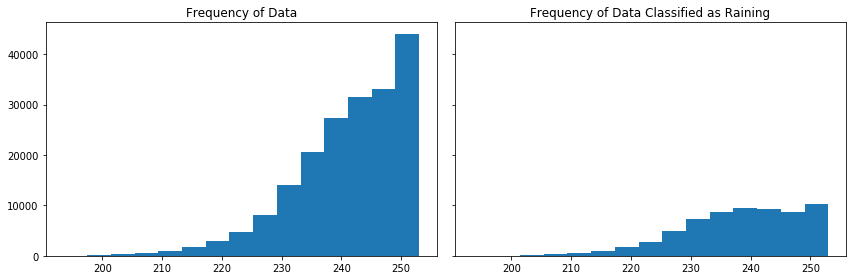

Feature 2


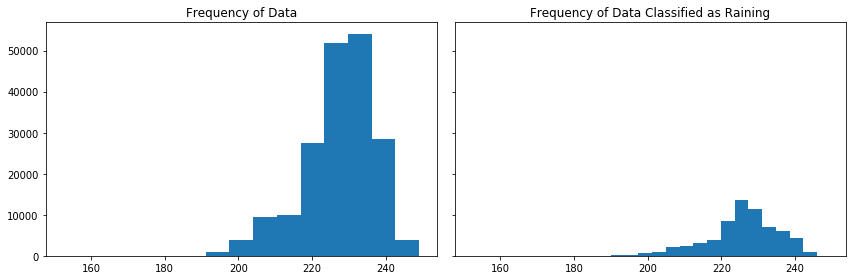

Feature 3


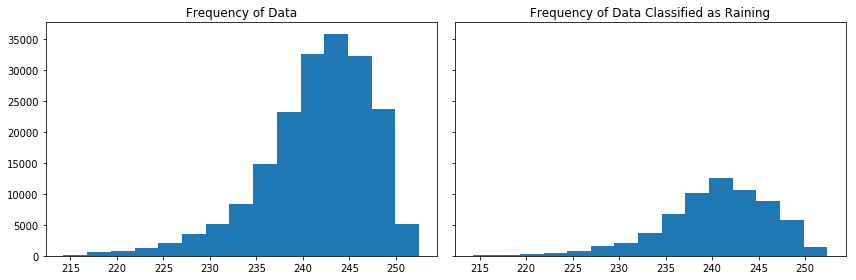

Feature 4


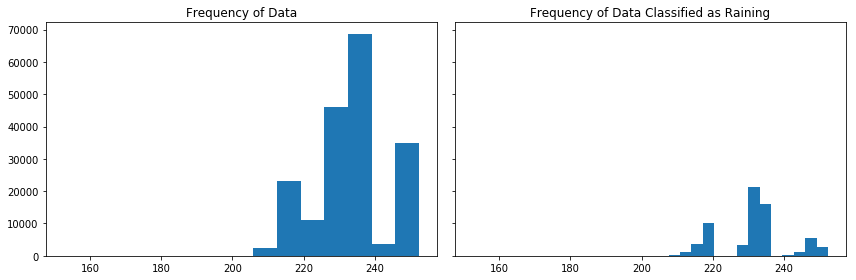

Feature 5


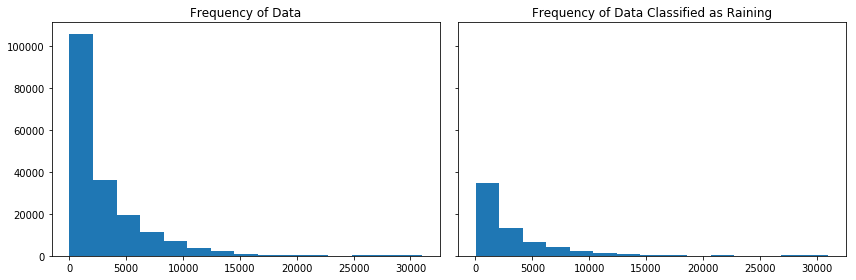

Feature 6


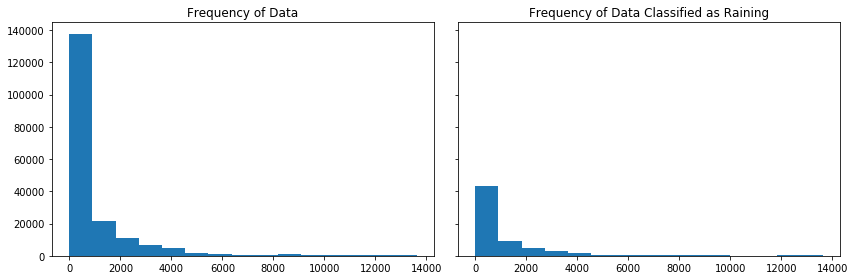

Feature 7


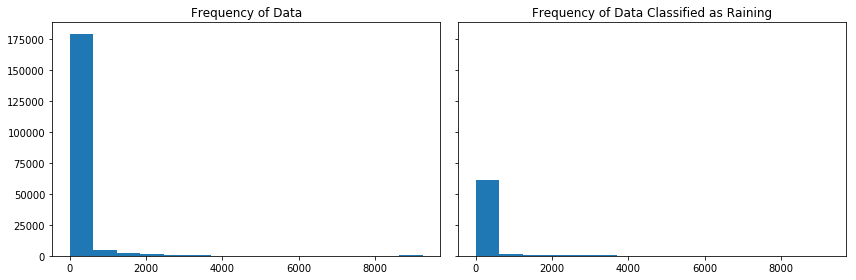

Feature 8


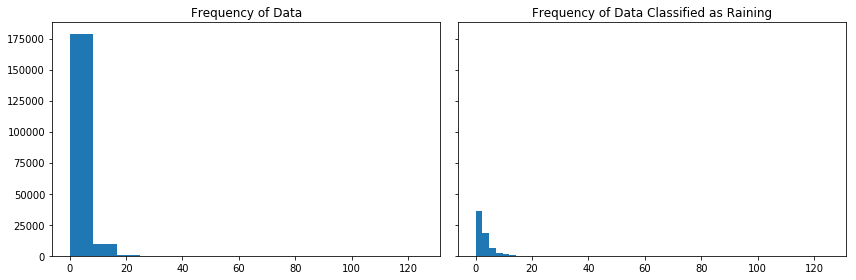

Feature 9


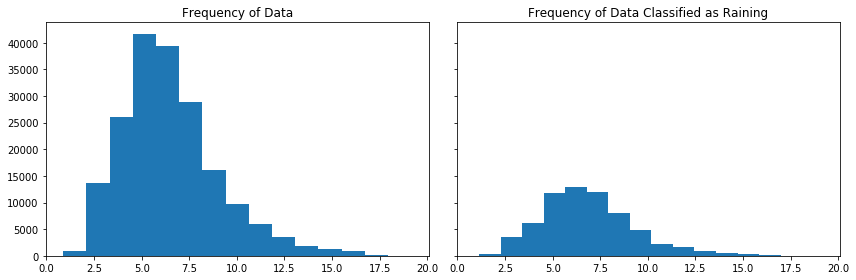

Feature 10


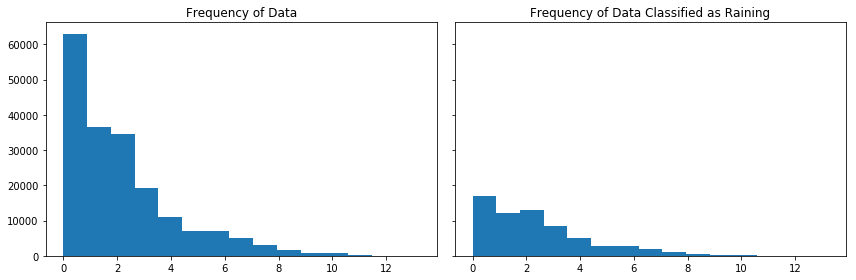

Feature 11


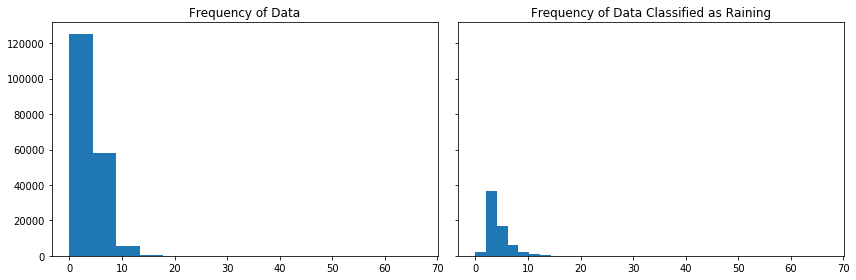

Feature 12


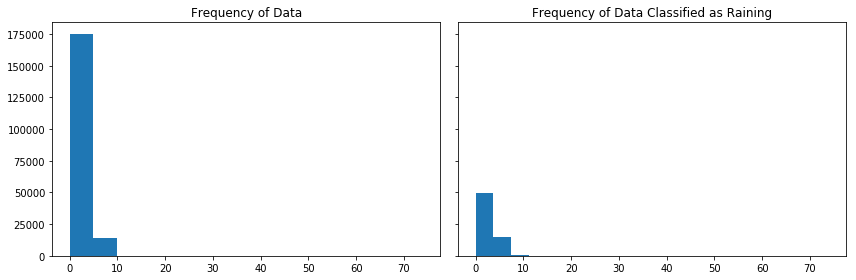

Feature 13


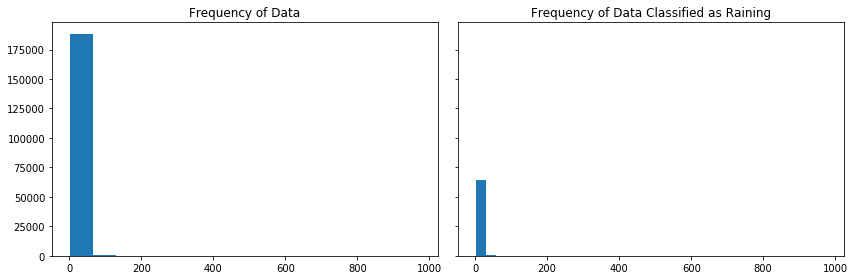

Feature 14


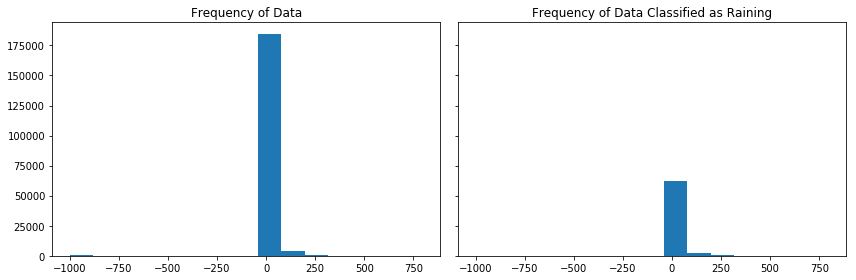

In [4]:
features = int(X.shape[1])
bins = 15
for n in range(features):
    print("Feature {}".format(n+1))
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4),sharey=True, sharex=True)
    ax1.hist(Xtr[:,n], bins=bins)
    ax1.set_title("Frequency of Data")
    ax2.hist(frequencyOfFeature(Xtr[:,n],Ytr.tolist(),bins), bins=bins)
    ax2.set_title("Frequency of Data Classified as Raining")    
    plt.tight_layout()
    plt.show()


In [56]:
def results(learner, Xtr, Ytr, Xva, Yva):
    predict = learner.predict_proba(Xtr)[:,1]
    predictVA = learner.predict_proba(Xva)[:,1]

    fpr, tpr, threshold = skl.metrics.roc_curve(Ytr, predict)
    fprVA, tprVA, thresholdVA = skl.metrics.roc_curve(Yva, predictVA)

    roc_auc = metrics.auc(fpr, tpr)
    roc_aucVA = metrics.auc(fprVA, tprVA)

    f, ax = plt.subplots(1,1, figsize=(14, 8))
    ax.plot(fpr, tpr, label='AUC Train = {:.4f}'.format(roc_auc))
    ax.plot(fprVA, tprVA, label='AUC Valid = {:.4f}'.format(roc_aucVA))
    plt.legend(loc=4)
    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("Difference in Area: {}".format(roc_auc - roc_aucVA))
    print("Train Score: {}".format(learner.score(Xtr,Ytr)))
    print("Valid Score: {}".format(learner.score(Xva,Yva)))
    
def resultsPredict(learner, Xtr, Ytr, Xva, Yva):
    predict = learner.predict(Xtr)
    predictVA = learner.predict(Xva)

    fpr, tpr, threshold = skl.metrics.roc_curve(Ytr, predict)
    fprVA, tprVA, thresholdVA = skl.metrics.roc_curve(Yva, predictVA)

    roc_auc = metrics.auc(fpr, tpr)
    roc_aucVA = metrics.auc(fprVA, tprVA)

    f, ax = plt.subplots(1,1, figsize=(14, 8))
    ax.plot(fpr, tpr, label='AUC Train = {:.4f}'.format(roc_auc))
    ax.plot(fprVA, tprVA, label='AUC Valid = {:.4f}'.format(roc_aucVA))
    plt.legend(loc=4)
    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("Difference in Area: {}".format(roc_auc - roc_aucVA))
    print("Train Score: {}".format(learner.score(Xtr,Ytr)))
    print("Valid Score: {}".format(learner.score(Xva,Yva)))

# Decision Tree

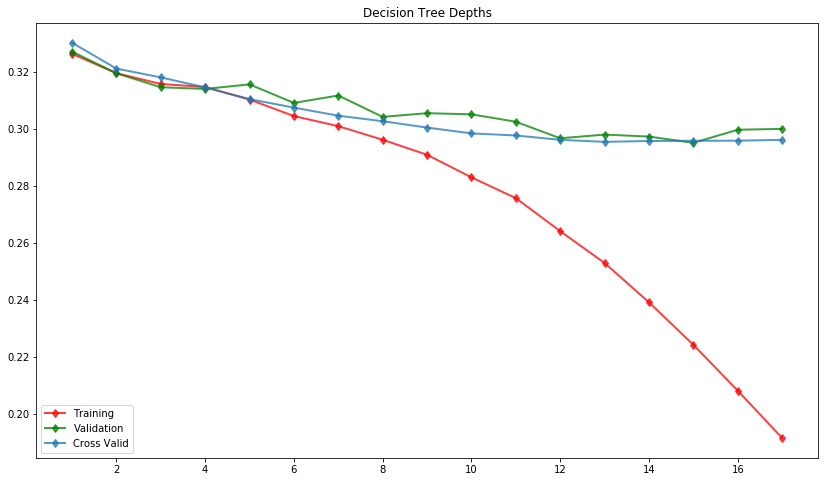

Lowest Train Error at Depth: 17, 0.191610526316
Lowest Valid Error at Depth: 15, 0.2951
Lowest Cross Valid Error at Depth: 13, 0.295457894737


In [6]:
MAX_DEPTHS = 18
N_FOLD = 5

depths = np.array([i for i in range(1,MAX_DEPTHS)])
training_error = np.zeros(len(depths))
validation_error = np.zeros(len(depths))
cross_valid_error = np.zeros(len(depths))

for n,i in enumerate(depths):
    learner = skl.tree.DecisionTreeClassifier(max_features=14, max_depth = i)
    learner.fit(Xtr,Ytr)
    training_error[n] = 1 - learner.score(Xtr, Ytr)
    validation_error[n] = 1- learner.score(Xva, Yva)
    cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
f, ax = plt.subplots(1,1, figsize=(14, 8))
ax.plot(depths, training_error, lw=2, c='r', marker='d', alpha=0.75, label='Training')
ax.plot(depths, validation_error, lw=2, c='g', marker='d', alpha=0.75, label='Validation')
ax.plot(depths, cross_valid_error, lw=2, marker='d', alpha=0.75, label='Cross Valid')
ax.legend(loc=3)
plt.title("Decision Tree Depths")
plt.show()

minTrainError = min(training_error.tolist())
minValidError = min(validation_error.tolist())
minCrossValidError = min(cross_valid_error.tolist())
print("Lowest Train Error at Depth: {}, {}".format(training_error.tolist().index(minTrainError) + 1, minTrainError))
print("Lowest Valid Error at Depth: {}, {}".format(validation_error.tolist().index(minValidError) + 1, minValidError))
print("Lowest Cross Valid Error at Depth: {}, {}".format(cross_valid_error.tolist().index(minCrossValidError) + 1,
                                                         minCrossValidError))

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]


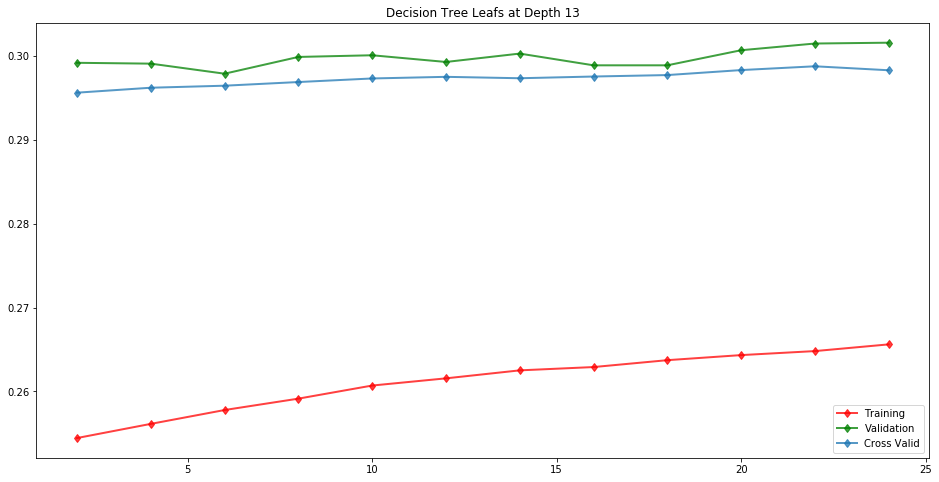

Lowest Train Error at Leaf: 2, 0.254431578947
Lowest Valid Error at Leaf: 6, 0.2979
Lowest Cross Valid Error at Leaf: 2, 0.295636842105


In [7]:
DEPTH = 13
minLeaf= [2*n for n in range(1,13)]
minLeaf_train_error = np.zeros(len(minLeaf))
minLeaf_valid_error = np.zeros(len(minLeaf))
minLeaf_cross_valid_error = np.zeros(len(minLeaf))
print(minLeaf)

for n,i in enumerate(minLeaf):
    learner = skl.tree.DecisionTreeClassifier(max_features=14, max_depth = DEPTH, min_samples_leaf=i)
    learner.fit(Xtr,Ytr)
    minLeaf_train_error[n] = 1 - learner.score(Xtr, Ytr)
    minLeaf_valid_error[n] = 1 - learner.score(Xva, Yva)
    minLeaf_cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
f, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(minLeaf, minLeaf_train_error, lw=2, marker='d', c='r', alpha=0.75, label='Training')
ax.plot(minLeaf, minLeaf_valid_error, lw=2, marker = 'd', c='g', alpha=0.75, label='Validation')
ax.plot(minLeaf, minLeaf_cross_valid_error, lw=2, marker = 'd', alpha=0.75, label='Cross Valid')
ax.legend()
plt.title("Decision Tree Leafs at Depth {}".format(DEPTH))
plt.show()

minTrainError = min(minLeaf_train_error.tolist())
minValidError = min(minLeaf_valid_error.tolist())
minCrossValidError = min(minLeaf_cross_valid_error.tolist())

print("Lowest Train Error at Leaf: {}, {}".format(minLeaf[minLeaf_train_error.tolist().index(minTrainError)], minTrainError))
print("Lowest Valid Error at Leaf: {}, {}".format(minLeaf[minLeaf_valid_error.tolist().index(minValidError)],
                                                  minValidError))
print("Lowest Cross Valid Error at Leaf: {}, {}".format(
                                            minLeaf[minLeaf_cross_valid_error.tolist().index(minCrossValidError)],
                                            minCrossValidError))

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]


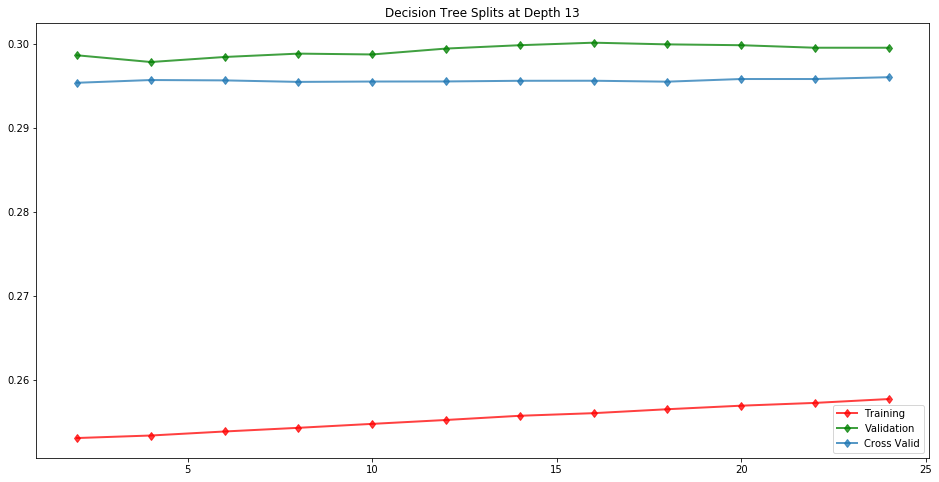

Lowest Train Error at Split: 2, 0.253073684211
Lowest Valid Error at Split: 4, 0.2978
Lowest Cross Valid Error at Split: 2, 0.295331578947


In [8]:
DEPTH = 13
minSplit= [2*n for n in range(1,13)]
minSplit_train_error = np.zeros(len(minSplit))
minSplit_valid_error = np.zeros(len(minSplit))
minSplit_cross_valid_error = np.zeros(len(minSplit))
print(minSplit)

for n,i in enumerate(minSplit):
    learner = skl.tree.DecisionTreeClassifier(max_features=14, max_depth = DEPTH, min_samples_split=i)
    learner.fit(Xtr,Ytr)
    minSplit_train_error[n] = 1 - learner.score(Xtr, Ytr)
    minSplit_valid_error[n] = 1 - learner.score(Xva, Yva)
    minSplit_cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
f, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(minSplit, minSplit_train_error, lw=2, marker='d', c='r', alpha=0.75, label='Training')
ax.plot(minSplit, minSplit_valid_error, lw=2, marker = 'd', c='g', alpha=0.75, label='Validation')
ax.plot(minSplit, minSplit_cross_valid_error, lw=2, marker = 'd', alpha=0.75, label='Cross Valid')
ax.legend()
plt.title("Decision Tree Splits at Depth {}".format(DEPTH))
plt.show()

minTrainError = min(minSplit_train_error.tolist())
minValidError = min(minSplit_valid_error.tolist())
minCrossValidError = min(minSplit_cross_valid_error.tolist())

print("Lowest Train Error at Split: {}, {}".format(minSplit[minSplit_train_error.tolist().index(minTrainError)], minTrainError))
print("Lowest Valid Error at Split: {}, {}".format(minSplit[minSplit_valid_error.tolist().index(minValidError)],
                                                  minValidError))
print("Lowest Cross Valid Error at Split: {}, {}".format(
                                            minSplit[minSplit_cross_valid_error.tolist().index(minCrossValidError)],
                                            minCrossValidError))

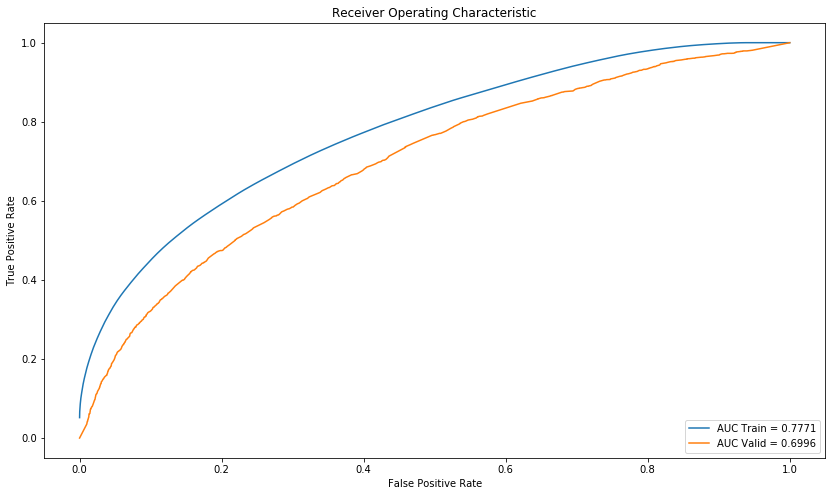

Difference in Area: 0.0774827670878
Train Score: 0.745584210526
Valid Score: 0.7012


In [9]:
#Final Tree
DEPTH = 13 #6 
LEAF = 2 #150
SPLIT = 5 #120

learner = skl.tree.DecisionTreeClassifier(max_features=14,max_depth = DEPTH,min_samples_leaf=LEAF,min_samples_split=SPLIT)
learner.fit(Xtr,Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

decisionTree = learner

# KNN Classifier

In [10]:
skl.neighbors.KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


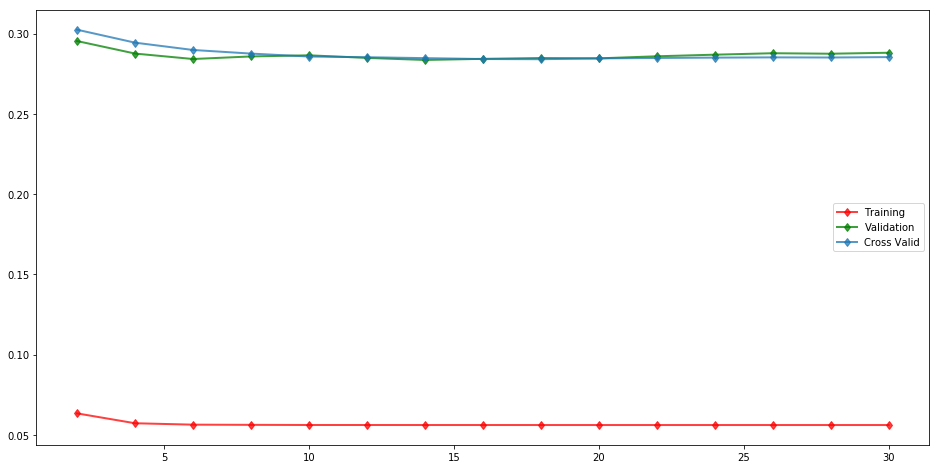

Lowest Train Error at NN: 18, 0.0561052631579
Lowest Valid Error at NN: 14, 0.2836
Lowest Cross Valid Error at NN: 18, 0.284078947368


In [11]:
NN = [2*n for n in range(1,16)]
NN_train_error = np.zeros(len(NN))
NN_valid_error = np.zeros(len(NN))
NN_cross_valid_error = np.zeros(len(NN))
print(NN)

for n,i in enumerate(NN):
    learner = skl.neighbors.KNeighborsClassifier(n_neighbors=i, weights="distance", n_jobs=-1)
    learner.fit(Xtr,Ytr)
    NN_train_error[n] = 1 - learner.score(Xtr, Ytr)
    NN_valid_error[n] = 1 - learner.score(Xva, Yva)
    NN_cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
f, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(NN, NN_train_error, lw=2, marker='d', c='r', alpha=0.75, label='Training')
ax.plot(NN, NN_valid_error, lw=2, marker = 'd', c='g', alpha=0.75, label='Validation')
ax.plot(NN, NN_cross_valid_error, lw=2, marker = 'd', alpha=0.75, label='Cross Valid')
ax.legend()
plt.show()

TrainError = min(NN_train_error.tolist())
ValidError = min(NN_valid_error.tolist())
CrossValidError = min(NN_cross_valid_error.tolist())

print("Lowest Train Error at NN: {}, {}".format(NN[NN_train_error.tolist().index(TrainError)], TrainError))
print("Lowest Valid Error at NN: {}, {}".format(NN[NN_valid_error.tolist().index(ValidError)],
                                                  ValidError))
print("Lowest Cross Valid Error at NN: {}, {}".format(NN[NN_cross_valid_error.tolist().index(CrossValidError)],
                                            CrossValidError))

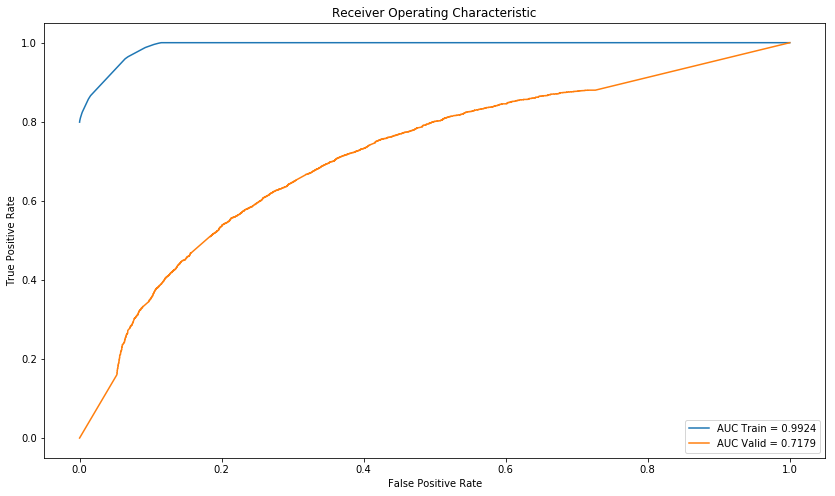

Difference in Area: 0.274452028499
Train Score: 0.943894736842
Valid Score: 0.715


In [12]:
neighbors = 17

learner = skl.neighbors.KNeighborsClassifier(n_neighbors=neighbors, weights="distance", n_jobs=-1)
learner.fit(Xtr,Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

KNN = learner

# Neural Network (Supervised)

In [13]:
skl.neural_network.MLPClassifier()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

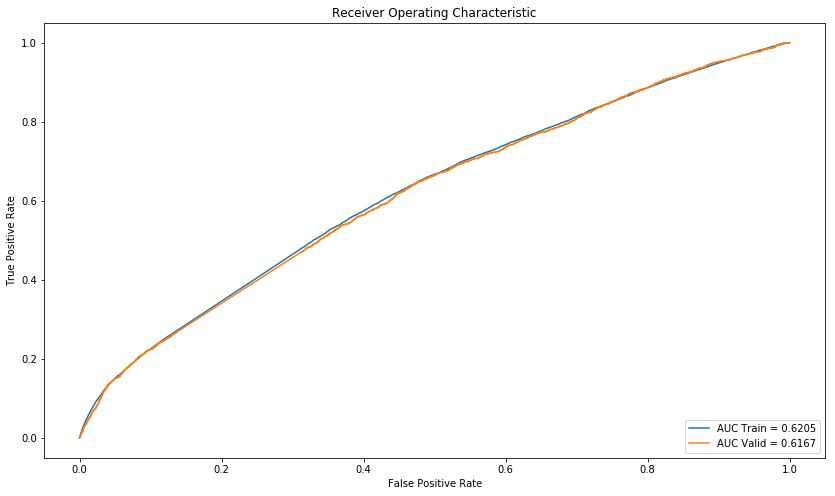

Difference in Area: 0.00380102093542
Train Score: 0.674631578947
Valid Score: 0.675


In [14]:
RANDOM_STATE = 42
ITER = 500
ALPHA = .0001
LAYERS = (100,80,50)
learner = skl.neural_network.MLPClassifier(alpha=ALPHA, hidden_layer_sizes=LAYERS,
                      random_state=RANDOM_STATE, max_iter=ITER) 
learner.fit(Xtr,Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

neuralNetwork = learner

In [15]:
learner

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 80, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

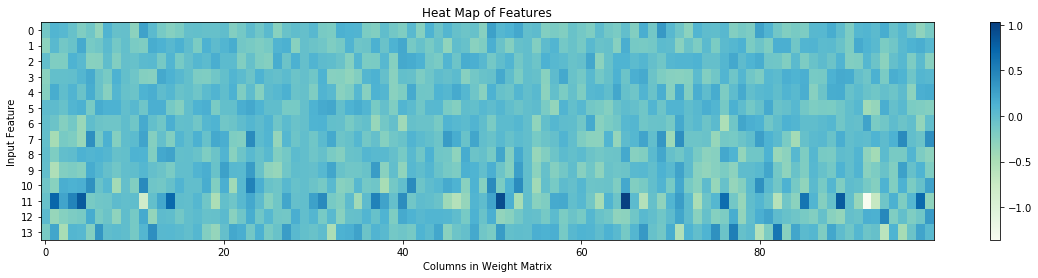

In [16]:
plt.figure(figsize=(20, 4))
plt.imshow(learner.coefs_[0], interpolation='None', cmap='GnBu', aspect='auto')
plt.yticks(range(features))
plt.title("Heat Map of Features")
plt.xlabel("Columns in Weight Matrix")
plt.ylabel("Input Feature")
plt.colorbar()
plt.show()

# Random Forest

In [104]:
skl.ensemble.RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

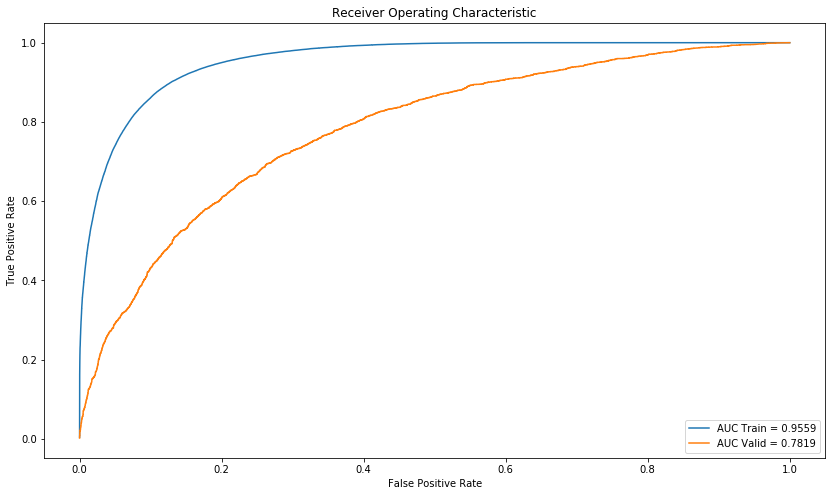

Difference in Area: 0.173973616094
Train Score: 0.880789473684
Valid Score: 0.7444


In [105]:
N_EST = 40
LEAF = 3 #3
SPLIT = None #120
learner = skl.ensemble.RandomForestClassifier(max_depth=None, n_estimators=N_EST, min_samples_leaf=LEAF, min_samples_split=3)
learner.fit(Xtr,Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

randomForest = learner

# AdaBoost

In [19]:
# base = skl.ensemble.RandomForestClassifier()
# n_est = [n for n in range(1,11)]

# n_est_train_error = np.zeros(len(n_est))
# n_est_valid_error = np.zeros(len(n_est))
# n_est_cross_valid_error = np.zeros(len(n_est))
# print(n_est)

# for n,i in enumerate(n_est):
#     learner = skl.ensemble.AdaBoostClassifier(base_estimator=base, n_estimators=i)
#     learner.fit(Xtr,Ytr)
#     n_est_train_error[n] = 1 - learner.score(Xtr, Ytr)
#     n_est_valid_error[n] = 1 - learner.score(Xva, Yva)
#     n_est_cross_valid_error[n] = 1 - np.mean(skl.model_selection.cross_val_score(learner, Xtr, Ytr, cv=5))
    
# print(n_est_train_error)
    
# f, ax = plt.subplots(1,1, figsize=(16, 8))
# ax.plot(n_est, n_est_train_error, lw=2, marker='d', c='r', alpha=0.75, label='Training')
# ax.plot(n_est, n_est_valid_error, lw=2, marker = 'd', c='g', alpha=0.75, label='Validation')
# ax.plot(n_est, n_est_cross_valid_error, lw=2, marker = 'd', alpha=0.75, label='Cross Valid')
# ax.legend()
# plt.show()

# minTrainError = min(n_est_train_error.tolist())
# minValidError = min(n_est_valid_error.tolist())
# minCrossValidError = min(n_est_cross_valid_error.tolist())

# print("Lowest Train Error at n_est: {}, {}".format(n_est[n_est_train_error.tolist().index(minTrainError)], minTrainError))
# print("Lowest Valid Error at n_est: {}, {}".format(n_est[n_est_valid_error.tolist().index(minValidError)],
#                                                   minValidError))
# print("Lowest Cross Valid Error at n_est: {}, {}".format(
#                                             n_est[n_est_cross_valid_error.tolist().index(minCrossValidError)],
#                                             minCrossValidError))

# adaBoost = learner

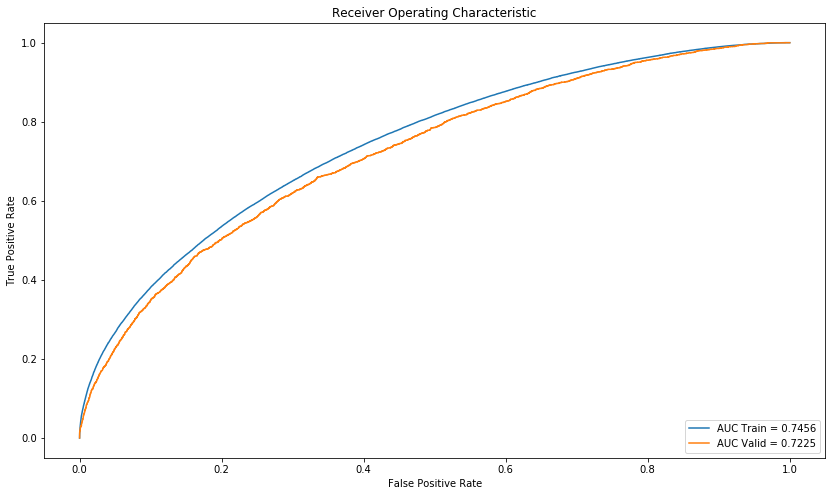

Difference in Area: 0.0231380095427
Train Score: 0.721315789474
Valid Score: 0.7108


In [20]:
base = skl.ensemble.RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=LEAF)
# learner = randomForest
n_est = 100 #100

learner = skl.ensemble.AdaBoostClassifier(base_estimator=base, n_estimators=n_est, learning_rate=1.0)
learner.fit(Xtr, Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

adaBoost = learner

# Gradient Boost

In [108]:
skl.ensemble.GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

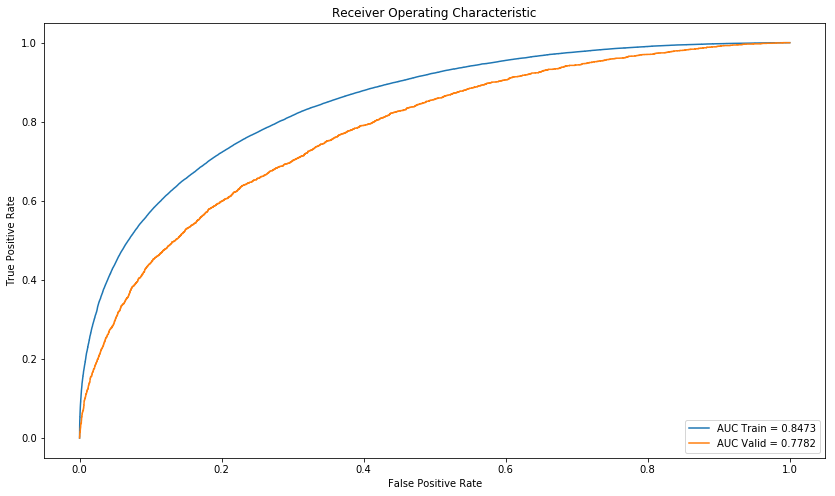

Difference in Area: 0.0691838852081
Train Score: 0.785078947368
Valid Score: 0.7437


In [132]:
# learner = skl.ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,
#                                              max_depth=10, max_leaf_nodes=15, random_state=0)

learner = skl.ensemble.GradientBoostingClassifier(n_estimators=1000, learning_rate=0.25,
                                             max_depth=3, max_leaf_nodes=15, random_state=0)
learner.fit(Xtr, Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

gradientBoost = learner

# Extra Trees Classifier

In [97]:
skl.ensemble.ExtraTreesClassifier()

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

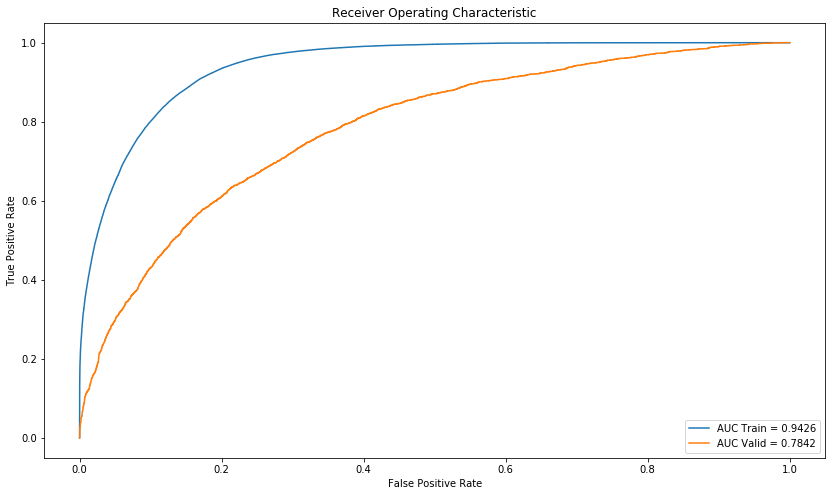

Difference in Area: 0.158418891569
Train Score: 0.845310526316
Valid Score: 0.7411


In [158]:
N_EST = 40
LEAF = 3 #3
SPLIT = None #120

learner = skl.ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_leaf=LEAF, n_jobs=-1)
learner.fit(Xtr, Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

extraTree = learner

# Voting Classifier

In [128]:
skl.ensemble.VotingClassifier(estimators=[], voting='soft')

VotingClassifier(estimators=[], flatten_transform=None, n_jobs=1,
         voting='soft', weights=None)

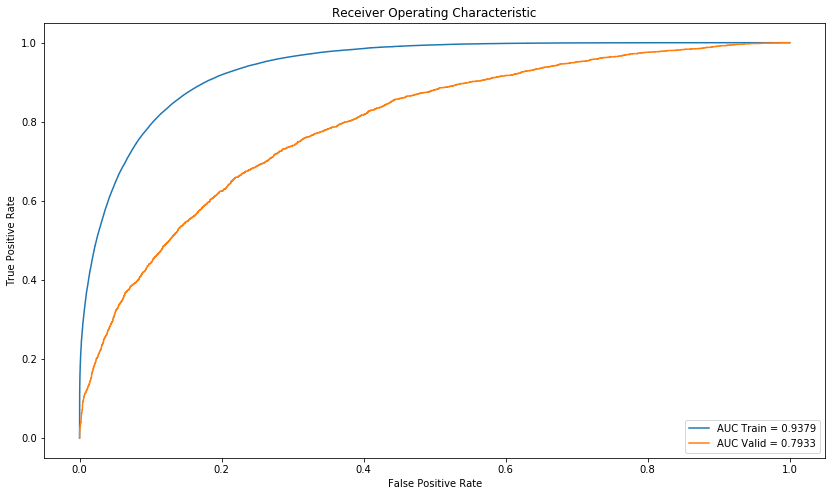

Difference in Area: 0.144600238571


C:\Users\Jackson\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train Score: 0.844952631579
Valid Score: 0.7447


C:\Users\Jackson\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [159]:
ESTIMATORS = [
        ('randomForest', randomForest),
        ('gradientBoost', gradientBoost),
#         ('KNN', KNN),
#         ('adaBoost', adaBoost),
        ('extraTree', extraTree),
    ]

WEIGHTS = [1,1,0.9]

learner = skl.ensemble.VotingClassifier(estimators=ESTIMATORS, voting='soft', n_jobs=-1)
learner.fit(Xtr,Ytr)

results(learner,Xtr,Ytr,Xva,Yva)

In [135]:
# Output
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predict_proba(Xte)[:,1])).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')